<h1>ANALISIS DE LAS SEMILLAS</h1>
<p>Nombre: Javier Cueto</p>
<p>A continuación, se realizará un análisis al dataset "seed_dataset.txt", la cual contiene características de diferentes semillas. Se aplicara reducción de dimensionalidad (PCA) y modelos de agrupamientos como K-Means, DBSCAN y JERARQUICO, donde se definirá cual se adapta mejor a los datos.</p>

<h3>CARGA DE DATOS</h3>
<p>Cargaremos los datos y le asignamos nombres a las columnas, ya que venía sin encabezado. Los nombres de las columnas están en la página de donde se extrajo el dataset.</p>

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)
df.columns = ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel',
              'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']

C:\Users\javie\AppData\Local\Temp\ipykernel_1760\1099629109.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)


<h3>SEPARAR Y ESCALAR DATOS</h3>
<p>Separamos los datos, siendo X los datos de las semillas e Y el tipo de semilla. Además, escalaremos los datos para lograr una distribución uniforme.</p>

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3>REDUCCION DE DIMENSIONALIDAD</h3>
<p>Reducimos la dimensionalidad de los datos a 2 componentes utilizando PCA. Utilizamos PCA porque ya lo habíamos utilizado antes.</p>

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<h3>CLUSTERING</h3>
<p>Para el agrupamiento, utilizaremos K-MEANS, DBSCAN y Jerárquico, los parámetros están con valores de prueba, más adelante de buscaran los mejores valores.</p>

In [18]:

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Jerárquico
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_scaled)

<h3>EVALUACION CON SILHOUETTE SCORE</h3>
<p>Para la evaluación se utilizará la métrica de SILHOUETTE SCORE, esta métrica ronda entre valores de -1 y 1. Mientras más cercano es este valor a 1, significa que los datos están mejor agrupados y separados entre clusters.</p>

In [19]:
# 6. Evaluación con Silhouette Score
print("Evaluación de métodos de agrupamiento (Silhouette Score):\n")

print("K-Means:", silhouette_score(X_scaled, labels_kmeans))

if len(set(labels_dbscan)) > 1 and (len(set(labels_dbscan)) - ( -1 in labels_dbscan )) > 1:
    mask = labels_dbscan != -1
    if sum(mask) > 1:
        print("DBSCAN:", silhouette_score(X_scaled[mask], labels_dbscan[mask]))
    else:
        print("DBSCAN: No se puede calcular (muy pocos puntos sin ruido)")
else:
    print("DBSCAN: No se puede calcular (solo un cluster o mucho ruido)")

print("Jerárquico:", silhouette_score(X_scaled, labels_agg))

Evaluación de métodos de agrupamiento (Silhouette Score):

K-Means: 0.4024370101867174
DBSCAN: 0.528197972897107
Jerárquico: 0.4612971903388491


<p>DBSCAN fue la que obtuvo los mejores resultados con 0.52, mientras que K-MEANS y Jerárquico obtuvieron unos resultados parecidos pero inferiores.</p>

<h3>VISUALIZACION</h3>
<p>Visualizaremos los clusters con PCA de manera gráfica, para poder observar de mejor manera los resultados.</p>

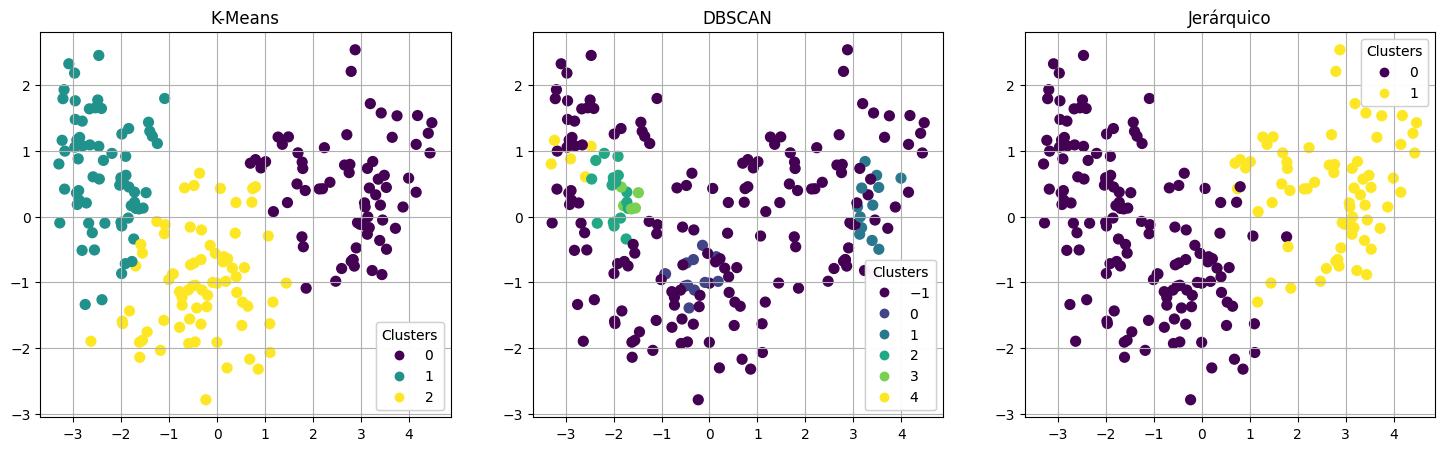

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Helper para graficar
def plot_clusters(ax, X, labels, title):
    scatter = ax.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    ax.grid(True)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

plot_clusters(axs[0], X_pca, labels_kmeans, "K-Means")
plot_clusters(axs[1], X_pca, labels_dbscan, "DBSCAN")
plot_clusters(axs[2], X_pca, labels_agg, "Jerárquico")

plt.show()


<p><ul>
    <li>En el grafico de K-Means obtuvimos los 3 grupos definidos claramente, aunque algunos clusters quedaron debajo de otros. </li>
    <li>En el grafico de DBSCAN se detectaron 6 clusters, debido a que se basa en la densidad. El -1 representa los puntos que tienen ruido.</li>
    <li>En el grafico de Jerárquico, obtuvimos un resultado similar a K-means, pero con menos clusters debido a que se definió con 2, que son los por defecto.</li>
</p>

<h1>MEJORES PARAMETROS</h1>
<p>Evaluaremos los mejores parámetros para cada algoritmo, con el fin de saber los que se deberían utilizar en este dataset.</p>

<h3>K-MEANS</h3>

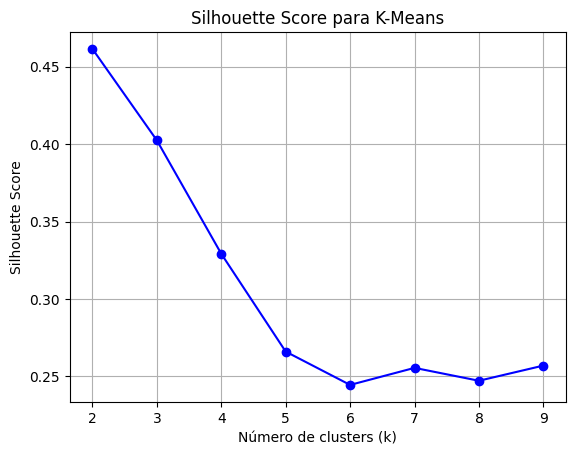

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = np.arange(2, 10)
scores_km = np.zeros(Ks.shape[0])

for i, k in enumerate(Ks):
    km_ = KMeans(n_clusters=k, random_state=42)
    km_.fit(X_scaled)
    scores_km[i] = silhouette_score(X_scaled, km_.labels_)

plt.plot(Ks, scores_km, 'b-o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-Means')
plt.grid(True)
plt.show()


<p>Según los resultados obtenidos, el número de clusters debería ser 2, obteniendo los mejores resultados con la métrica de Silhouette Score.</p>

<h3>DBSCAN</h3>

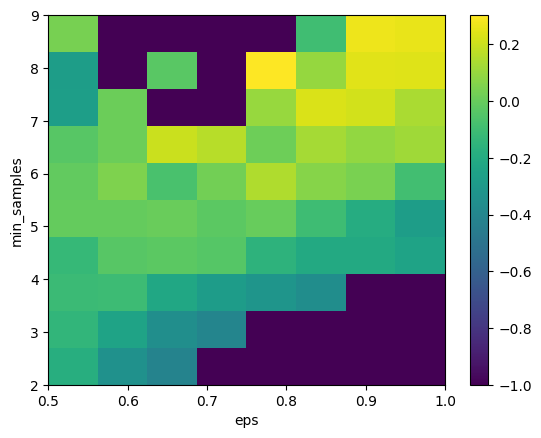

In [22]:
eps = np.linspace(0.5, 1, 10)
points = np.arange(2, 10)
scores_dbscan = np.zeros((eps.shape[0], points.shape[0]))

for i, e in enumerate(eps):
    for j, p in enumerate(points):
        dbs_ = DBSCAN(eps=e, min_samples=p)
        dbs_ = dbs_.fit(X_scaled)
        labels = dbs_.labels_
        # Silhouette solo si hay más de 1 cluster (sin contar ruido)
        if len(set(labels)) - (1 if -1 in labels else 0) > 1:
            scores_dbscan[i,j] = silhouette_score(X_scaled, labels)
        else:
            scores_dbscan[i,j] = -1

plt.imshow(scores_dbscan, origin="lower", extent=[eps.min(), eps.max(), points.min(), points.max()], aspect='auto')
plt.colorbar()
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()


<p>Para DBSCAN, se obtuvieron los mejores resultados para la métrica Silhouette Score con "eps=0.5" y "min_samples=2". </p>

<h3>JERARQUICO</h3>

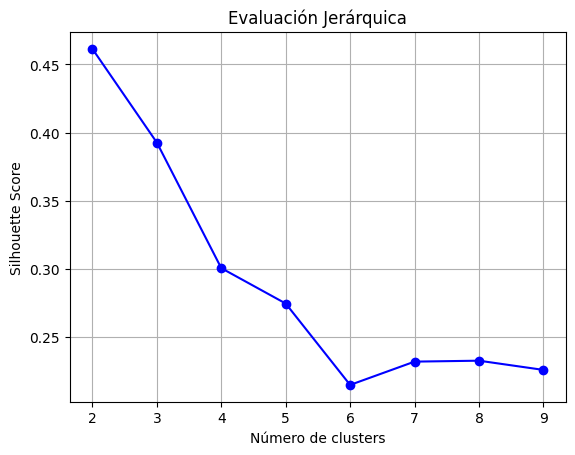

In [8]:
cls = np.arange(2, 10)
scores_ac = np.zeros(cls.shape[0])

for i, cl in enumerate(cls):
    ac_ = AgglomerativeClustering(n_clusters=cl)
    ac_ = ac_.fit(X_scaled)
    scores_ac[i] = silhouette_score(X_scaled, ac_.labels_)

plt.plot(cls, scores_ac, 'b-o')
plt.grid(True)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Evaluación Jerárquica')
plt.show()


<p>Para Jerárquica obtuvimos los mismos resultados que K-Means, obtiene los mejores resultados de la métrica Silhouette Score con 2 clusters.</p>

<h1>CONCLUSION</h1>
<p>En base a los resultados obtenidos, los algoritmos de clustering no supervisado nos ayudan a encontrar relaciones entre los datos, además de la reducción de dimensionalidad que nos permite simplificar los datos. Ahora veremos los resultados obtenidos.
    <ul>
        <li>DBSCAN: Al ser un método basado en la densidad, identifico 6 clusters, obteniendo los mejores resultados con un "eps=0.5", "min_samples=2" y un Silhouette Score de 0.53. </li>
        <li>K-MEANS: Obtuvo buenos resultados al utilizar 2 clusters, con un Silhouette Score de 0.49, pero siendo superado por el Jerárquico.</li>
        <li>JERARQUICO: Fue el que obtuvo mejor resultado en el al utilizar 2 clusters, obteniendo un Silhouette Score de 0.55.</li>
    </ul>
En resumen, el algoritmo jerárquico obtuvo mejores resultados en base a la medición con la métrica Silhouette Score, pero DBSCAN demostró que puede encontrar más grupos de forma más detallada.
</p>